In [1]:
# Imported relevant packages
import numpy as np 
import netCDF4 as nc
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [2]:
# Created a list with the names of each relevant dataset to be examined
# Data extracted from VIIRS/SNPP Deep Blue Level 3 daily aerosol data, 1x1 degree grid from NASA's LAADS DAAC
list_files = ["mar_15.nc","mar_16.nc","mar_17.nc","mar_18.nc"]

# Defined the coordinates of Cabo Frio
lat = -22.5
lon = -42.5

# Defined lists to hold relevant values
record_datetime = []
record_max_aerosol = []
record_mean_aerosol = []
record_min_aerosol = []
record_aerosol_hist = []

# Iteratively looked at the dataset of each day measurements were taken
for filename in list_files:
    ds = nc.Dataset(filename)
    
    # Set filters for the data to only look at measurements from Cabo Frio
    latitude_filter = np.array(ds.variables['Latitude']) == lat
    longitude_filter = np.array(ds.variables['Longitude']) == lon
    latitude_and_longitude_filter = latitude_filter & longitude_filter
    
    # Extracted the range (max,mean,min) of aerosol optical thickness over the relevant space
    max_aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Maximum'])
    max_aerosol[max_aerosol<0] = np.nan #exclude invalid values
    record_max_aerosol.append(max_aerosol[latitude_and_longitude_filter])
    
    mean_aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'])
    mean_aerosol[mean_aerosol<0] = np.nan #exclude invalid values
    record_mean_aerosol.append(mean_aerosol[latitude_and_longitude_filter])
    
    min_aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Minimum'])
    min_aerosol[min_aerosol<0] = np.nan #exclude invalid values
    record_min_aerosol.append(min_aerosol[latitude_and_longitude_filter])
    
    # Extracted the histogram of measured aerosol types over the relevant space
    types = np.array(ds.variables['Aerosol_Type_Land_Ocean_Histogram'])
    record_aerosol_hist.append(np.concatenate(types[:,latitude_and_longitude_filter]))
    
    #Processed the datetime record to a form that can be plotted:
    record_datetime.append(datetime.strptime(ds.time_coverage_start[:10], "%Y-%m-%d"))    

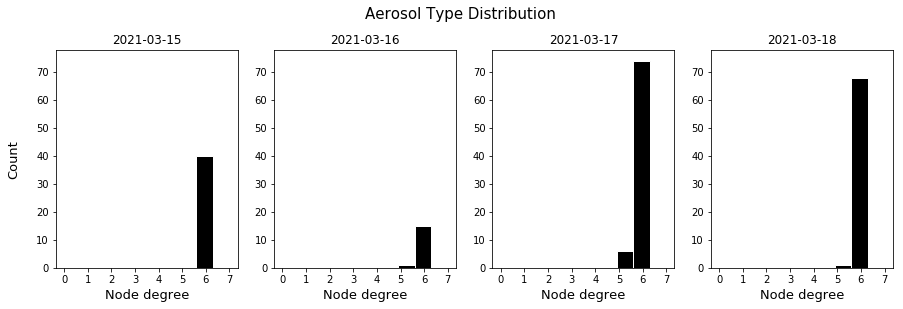

histograms of retrieved aerosol type over land and ocean. Indices (counting from 0) 0=dust(land+ocean), 1=smoke, 2=high altitude smoke, 3=pyrocumulonimbus clouds, 4=non-smoke fine mode, 5=mixed(land+ocean), 6=background(land+ocean maritime), 7=fine dominated


In [3]:
# Plotted the distribution of aerosol types measured in each day
fig, axs = plt.subplots(1,4,figsize=(15,4))
for i,ax in enumerate(axs.flat):
    plt.subplot(141+i,sharey=axs[0])
    plt.hist(range(0,8),weights=record_aerosol_hist[i],color='k',edgecolor='w')
    plt.title(str(record_datetime[i])[:10])
    plt.xlabel('Node degree',fontsize=13)
    plt.xticks(range(0,8))
plt.suptitle('Aerosol Type Distribution',fontsize=15,y=1.03)
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical',fontsize=13)
plt.show()

# Printed dataset reference of what is plotted
print(ds.variables['Aerosol_Type_Land_Ocean_Histogram'].long_name)

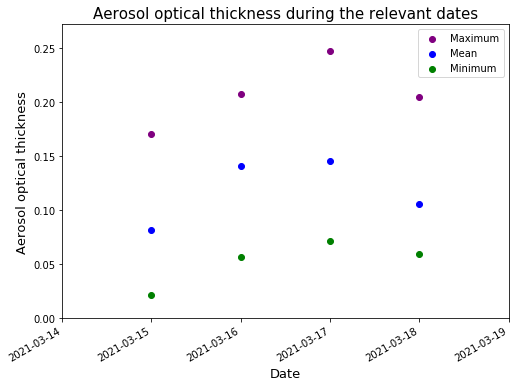

aerosol optical thickness estimated at 550 nm over land and ocean


In [4]:
# Created a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plotted the corresponding aerosol optical thickness range for each day
ax.scatter(record_datetime, record_max_aerosol,color='purple',label='Maximum')
ax.scatter(record_datetime, record_mean_aerosol,color='b',label='Mean')
ax.scatter(record_datetime, record_min_aerosol,color='g',label='Minimum')

# Formatted the plot's axes
ax.set_xlim([min(record_datetime)- timedelta(days=1), max(record_datetime)+ timedelta(days=1)])
ax.set_ylim([0,max(record_max_aerosol)+0.025])
plt.gcf().autofmt_xdate()

# Created labels for the plot
plt.title('Aerosol optical thickness during the relevant dates',fontsize=15)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Aerosol optical thickness',fontsize=13)
plt.legend()
plt.show()

# Printed dataset reference of what is plotted
print(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'].long_name)